In [54]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

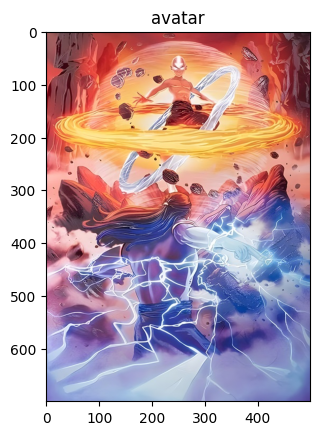

In [55]:
Image = plt.imread("gambar/aang.jpg")

plt.title("avatar")
plt.imshow(Image,cmap="gray")

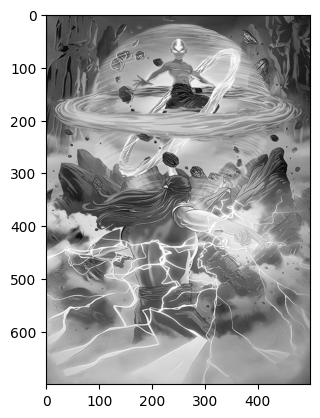

In [56]:
gray_image= cv.cvtColor(Image,cv.COLOR_BGR2GRAY)

plt.imshow(gray_image,cmap="gray")


tinggi:  700
tinggi:  500
[   0    0    0   11   22   29   59   76   59   73   68   73   92   77
  110  103  159  127  130  162  171  163  157  147  146  150  143  168
  191  249  348  362  401  412  360  375  389  400  396  406  484  430
  482  473  538  502  589  584  614  592  620  635  636  662  680  819
  772  900  916  943 1066 1100 1142 1183 1273 1282 1207 1189 1140 1242
 1491 1756 1787 1930 1881 1894 2034 2083 2180 2174 2128 2059 1966 1942
 1893 1810 1774 1773 1848 1891 1830 1764 1744 1743 1749 1717 1833 1938
 1744 1732 1788 1829 1869 1859 1664 1715 1787 1727 1754 1767 1881 1813
 1900 1811 1843 1811 1810 1784 1757 1845 1758 1681 1712 1752 1724 1717
 1734 1723 1647 1630 1781 1646 1679 1757 1793 1724 1791 1876 1971 1948
 2109 2034 2081 2079 2157 2129 2182 2059 2143 2203 2221 2204 2269 2445
 2404 2359 2277 2557 2670 2690 2636 2607 2768 2709 2767 2953 2752 2708
 2622 2671 2592 2497 2534 2478 2643 2654 2540 2556 2467 2394 2529 2463
 2606 2672 2411 2481 2564 2436 2509 2483 2168 2146 

<BarContainer object of 256 artists>

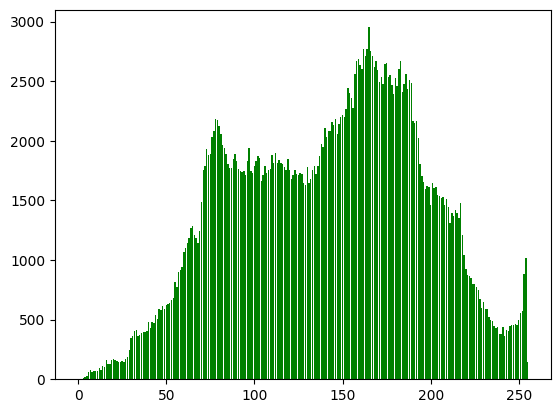

In [57]:
gray_image.sum()

kanvas = [i for i in range (256)]

tinggi, lebar = gray_image.shape

print("tinggi: ",tinggi)
print("tinggi: ",lebar)

kanvas2 = np.zeros(256, dtype=int)

for i in range (tinggi):
    for j in range (lebar):
        value = gray_image[i,j]

        kanvas2[value]+= 1

print(kanvas2)

plt.bar(kanvas,kanvas2,color="green")
